In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

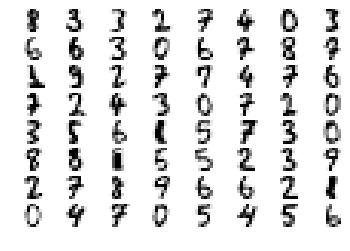

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
numbers = [*range(10)] # number 2 > number 1
number_of_classification = len(numbers)


list_y = y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend(li)

samplesize = X[digits_indexes].shape[0]
x_inputs =[tuple(c) for c in X[digits_indexes].tolist()]
x_outputs = [tuple(c) for c in y[digits_indexes].reshape(samplesize,1).tolist()]

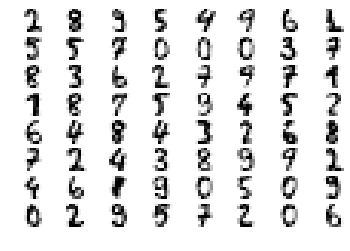

In [6]:
from random import randint
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(np.array(x_inputs[randint(0, samplesize)]).reshape(8,8), cmap='Greys')
plt.show()

In [7]:
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        
        outputs = []
        for xi in x_inputs:
            output = net.activate(xi)
            outputs.append(output)
        
        
        px_outputs = softmax(np.array(outputs).reshape(samplesize, number_of_classification), axis=1)
        # the index of maximum in each line
        pred_outputs = np.argmax(px_outputs, axis = 1)
        # replace index to real number, from higher number to lower number!!
        for i in range(number_of_classification):
            index = number_of_classification - i - 1
            pred_outputs[pred_outputs==index] = numbers[index]
        
        real_outputs = np.array(x_outputs).reshape(samplesize,)
        
        acc = np.sum(pred_outputs == real_outputs)/samplesize

        genome.fitness = acc

def run(config_file):
    # Load configuration.
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_file,
    )

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # add a stdout reporter to show progress in the terminal
    reporter = neat.StdOutReporter(False)
    p.add_reporter(reporter)
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    #checkpointer = neat.Checkpointer(100)
    #p.add_reporter(checkpointer)
    # Run for up to 300 generations.
    winner = p.run(eval_genomes, 1500)

    return [stats, winner]


samplesize = len(x_outputs)

local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist10")
[stats, winner] = run(config_path)

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)


 ****** Running generation 0 ****** 

Population's average fitness: 0.09765 stdev: 0.03530
Best fitness: 0.21088 - size: (10, 64) - species 10 - id 46
Average adjusted fitness: 0.097
Mean genetic distance 2.829, standard deviation 0.294
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 63.253 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.11471 stdev: 0.03592
Best fitness: 0.21088 - size: (10, 64) - species 10 - id 46
Average adjusted fitness: 0.092
Mean genetic distance 2.920, standard deviation 0.327
Population of 208 members in 44 species
Total extinctions: 0
Generation time: 87.654 sec (75.454 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.12282 stdev: 0.03832
Best fitness: 0.23377 - size: (10, 64) - species 5 - id 448
Average adjusted fitness: 0.104
Mean genetic distance 2.965, standard deviation 0.334
Population of 212 members in 44 species
Total extinctions: 0
Generation time: 96.306 sec (8

Population's average fitness: 0.17025 stdev: 0.05149
Best fitness: 0.29499 - size: (14, 67) - species 6 - id 2633
Average adjusted fitness: 0.132
Mean genetic distance 3.155, standard deviation 0.409
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 63.221 sec (62.815 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.16560 stdev: 0.05264
Best fitness: 0.29499 - size: (14, 67) - species 6 - id 2633
Average adjusted fitness: 0.139
Mean genetic distance 3.163, standard deviation 0.404
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 64.902 sec (63.132 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.16718 stdev: 0.05373
Best fitness: 0.29499 - size: (14, 67) - species 6 - id 2633
Average adjusted fitness: 0.124
Mean genetic distance 3.182, standard deviation 0.410
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 62.602 sec (63.140 average)

 

Population's average fitness: 0.17561 stdev: 0.05765
Best fitness: 0.31045 - size: (16, 71) - species 3 - id 5524
Average adjusted fitness: 0.118
Mean genetic distance 3.185, standard deviation 0.531
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 64.647 sec (66.100 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.16639 stdev: 0.06068
Best fitness: 0.31045 - size: (16, 71) - species 3 - id 5524
Average adjusted fitness: 0.154
Mean genetic distance 3.166, standard deviation 0.523
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 64.708 sec (65.891 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.18084 stdev: 0.06050
Best fitness: 0.31045 - size: (16, 71) - species 3 - id 5524
Average adjusted fitness: 0.134
Mean genetic distance 3.162, standard deviation 0.528
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 67.074 sec (66.012 average)

 

Population's average fitness: 0.17564 stdev: 0.05811
Best fitness: 0.34632 - size: (17, 75) - species 17 - id 9378
Average adjusted fitness: 0.163
Mean genetic distance 3.066, standard deviation 0.549
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 70.927 sec (68.668 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.17994 stdev: 0.06432
Best fitness: 0.35869 - size: (19, 78) - species 52 - id 10872
Average adjusted fitness: 0.129
Mean genetic distance 3.073, standard deviation 0.543
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 70.681 sec (68.700 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.18085 stdev: 0.06147
Best fitness: 0.35869 - size: (19, 78) - species 52 - id 10872
Average adjusted fitness: 0.118
Mean genetic distance 3.058, standard deviation 0.558
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 75.450 sec (69.398 averag

Population's average fitness: 0.19301 stdev: 0.06649
Best fitness: 0.37168 - size: (16, 72) - species 55 - id 14065
Average adjusted fitness: 0.148
Mean genetic distance 3.008, standard deviation 0.537
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 70.663 sec (69.628 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.19567 stdev: 0.06451
Best fitness: 0.37168 - size: (16, 72) - species 55 - id 14065
Average adjusted fitness: 0.117
Mean genetic distance 2.982, standard deviation 0.522
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 72.049 sec (69.959 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.19102 stdev: 0.06737
Best fitness: 0.37168 - size: (16, 72) - species 55 - id 14065
Average adjusted fitness: 0.117
Mean genetic distance 2.968, standard deviation 0.511
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 73.255 sec (70.480 avera

Population's average fitness: 0.18841 stdev: 0.07130
Best fitness: 0.40507 - size: (16, 73) - species 55 - id 18732
Average adjusted fitness: 0.142
Mean genetic distance 3.070, standard deviation 0.623
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 73.074 sec (73.846 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.19682 stdev: 0.06930
Best fitness: 0.40507 - size: (16, 73) - species 55 - id 18732
Average adjusted fitness: 0.132
Mean genetic distance 3.061, standard deviation 0.632
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 71.974 sec (73.693 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.19132 stdev: 0.07071
Best fitness: 0.40507 - size: (16, 73) - species 55 - id 18732
Average adjusted fitness: 0.152
Mean genetic distance 3.058, standard deviation 0.650
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 77.223 sec (74.028 averag

Population's average fitness: 0.18746 stdev: 0.06800
Best fitness: 0.40507 - size: (16, 73) - species 55 - id 18732
Average adjusted fitness: 0.152
Mean genetic distance 2.935, standard deviation 0.530
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 61.442 sec (64.870 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.19061 stdev: 0.06965
Best fitness: 0.40507 - size: (16, 73) - species 55 - id 18732
Average adjusted fitness: 0.125
Mean genetic distance 2.902, standard deviation 0.563
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 56.798 sec (63.380 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.18606 stdev: 0.06799
Best fitness: 0.40507 - size: (16, 73) - species 55 - id 18732
Average adjusted fitness: 0.148
Mean genetic distance 2.915, standard deviation 0.580
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 56.074 sec (61.966 averag

Population's average fitness: 0.19226 stdev: 0.07585
Best fitness: 0.40507 - size: (16, 73) - species 55 - id 18732
Average adjusted fitness: 0.178
Mean genetic distance 2.922, standard deviation 0.580
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 56.360 sec (55.873 average)

 ****** Running generation 169 ****** 

Population's average fitness: 0.19695 stdev: 0.07321
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.138
Mean genetic distance 2.911, standard deviation 0.585
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 57.047 sec (56.084 average)

 ****** Running generation 170 ****** 

Population's average fitness: 0.19536 stdev: 0.06791
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.156
Mean genetic distance 2.918, standard deviation 0.612
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 56.536 sec (56.142 aver

Population's average fitness: 0.18589 stdev: 0.07034
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.141
Mean genetic distance 2.876, standard deviation 0.522
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 58.369 sec (56.960 average)

 ****** Running generation 193 ****** 

Population's average fitness: 0.18445 stdev: 0.06791
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.147
Mean genetic distance 2.864, standard deviation 0.535
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 58.077 sec (57.159 average)

 ****** Running generation 194 ****** 

Population's average fitness: 0.18731 stdev: 0.06644
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.132
Mean genetic distance 2.769, standard deviation 0.505
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 58.106 sec (57.351 ave

Population's average fitness: 0.19603 stdev: 0.07034
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.133
Mean genetic distance 2.738, standard deviation 0.569
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 59.240 sec (59.353 average)

 ****** Running generation 217 ****** 

Population's average fitness: 0.19931 stdev: 0.06809
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.156
Mean genetic distance 2.762, standard deviation 0.537
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 58.005 sec (59.118 average)

 ****** Running generation 218 ****** 

Population's average fitness: 0.19815 stdev: 0.06760
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.158
Mean genetic distance 2.795, standard deviation 0.502
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 58.109 sec (58.875 averag

Population's average fitness: 0.20291 stdev: 0.06962
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.130
Mean genetic distance 2.729, standard deviation 0.472
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 54.755 sec (56.174 average)

 ****** Running generation 241 ****** 

Population's average fitness: 0.20059 stdev: 0.07042
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.119
Mean genetic distance 2.745, standard deviation 0.450
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 55.369 sec (56.134 average)

 ****** Running generation 242 ****** 

Population's average fitness: 0.20467 stdev: 0.07309
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.150
Mean genetic distance 2.763, standard deviation 0.445
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 57.355 sec (56.184 ave

Population's average fitness: 0.19763 stdev: 0.07420
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.165
Mean genetic distance 2.780, standard deviation 0.444
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 54.972 sec (54.367 average)

 ****** Running generation 265 ****** 

Population's average fitness: 0.20288 stdev: 0.07816
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.173
Mean genetic distance 2.803, standard deviation 0.464
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 54.336 sec (54.388 average)

 ****** Running generation 266 ****** 

Population's average fitness: 0.20077 stdev: 0.07330
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.151
Mean genetic distance 2.807, standard deviation 0.475
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 53.775 sec (54.342 ave

Population's average fitness: 0.19691 stdev: 0.07162
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.147
Mean genetic distance 2.805, standard deviation 0.453
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 54.136 sec (53.582 average)

 ****** Running generation 289 ****** 

Population's average fitness: 0.20364 stdev: 0.07150
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.145
Mean genetic distance 2.805, standard deviation 0.427
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 53.981 sec (53.687 average)

 ****** Running generation 290 ****** 

Population's average fitness: 0.19783 stdev: 0.07228
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.172
Mean genetic distance 2.803, standard deviation 0.442
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 53.649 sec (53.745 ave

Population's average fitness: 0.19827 stdev: 0.07128
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.138
Mean genetic distance 2.723, standard deviation 0.437
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 55.720 sec (55.424 average)

 ****** Running generation 313 ****** 

Population's average fitness: 0.20608 stdev: 0.07130
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.158
Mean genetic distance 2.730, standard deviation 0.429
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 56.111 sec (55.591 average)

 ****** Running generation 314 ****** 

Population's average fitness: 0.19679 stdev: 0.07223
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.156
Mean genetic distance 2.723, standard deviation 0.442
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 56.596 sec (55.779 averag

Population's average fitness: 0.20600 stdev: 0.07489
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.161
Mean genetic distance 2.745, standard deviation 0.449
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 54.192 sec (54.553 average)

 ****** Running generation 337 ****** 

Population's average fitness: 0.20382 stdev: 0.07468
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.157
Mean genetic distance 2.717, standard deviation 0.456
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 53.681 sec (54.422 average)

 ****** Running generation 338 ****** 

Population's average fitness: 0.20390 stdev: 0.08188
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.175
Mean genetic distance 2.684, standard deviation 0.491
Population of 196 members in 10 species
Total extinctions: 0
Generation time: 53.300 sec (54.191 ave

Population's average fitness: 0.21633 stdev: 0.07521
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.151
Mean genetic distance 2.792, standard deviation 0.510
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 56.061 sec (56.131 average)

 ****** Running generation 361 ****** 

Population's average fitness: 0.20925 stdev: 0.07471
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.153
Mean genetic distance 2.806, standard deviation 0.492
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 57.174 sec (56.338 average)

 ****** Running generation 362 ****** 

Population's average fitness: 0.20979 stdev: 0.07111
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.117
Mean genetic distance 2.790, standard deviation 0.524
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 57.994 sec (56.517 ave

Population's average fitness: 0.19309 stdev: 0.07533
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.155
Mean genetic distance 2.746, standard deviation 0.500
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 59.043 sec (59.677 average)

 ****** Running generation 385 ****** 

Population's average fitness: 0.19658 stdev: 0.07352
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.156
Mean genetic distance 2.708, standard deviation 0.529
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 59.720 sec (59.912 average)

 ****** Running generation 386 ****** 

Population's average fitness: 0.18915 stdev: 0.07061
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.170
Mean genetic distance 2.756, standard deviation 0.473
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 60.226 sec (60.179 averag

Population's average fitness: 0.19395 stdev: 0.07222
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.118
Mean genetic distance 2.766, standard deviation 0.524
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 61.192 sec (59.844 average)

 ****** Running generation 409 ****** 

Population's average fitness: 0.20036 stdev: 0.07426
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.149
Mean genetic distance 2.759, standard deviation 0.514
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 60.785 sec (59.864 average)

 ****** Running generation 410 ****** 

Population's average fitness: 0.20593 stdev: 0.07464
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.150
Mean genetic distance 2.731, standard deviation 0.505
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 60.185 sec (59.887 averag

Population's average fitness: 0.19453 stdev: 0.06677
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.140
Mean genetic distance 2.648, standard deviation 0.514
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 59.407 sec (60.117 average)

 ****** Running generation 433 ****** 

Population's average fitness: 0.18758 stdev: 0.07258
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.174
Mean genetic distance 2.692, standard deviation 0.455
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 56.767 sec (59.255 average)

 ****** Running generation 434 ****** 

Population's average fitness: 0.18564 stdev: 0.07273
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.152
Mean genetic distance 2.675, standard deviation 0.433
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 57.717 sec (58.727 averag

Population's average fitness: 0.20464 stdev: 0.08003
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.150
Mean genetic distance 2.724, standard deviation 0.474
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 57.509 sec (58.518 average)

 ****** Running generation 457 ****** 

Population's average fitness: 0.20544 stdev: 0.07728
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.180
Mean genetic distance 2.713, standard deviation 0.486
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 56.372 sec (58.452 average)

 ****** Running generation 458 ****** 

Population's average fitness: 0.19801 stdev: 0.07632
Best fitness: 0.41620 - size: (21, 78) - species 71 - id 28185
Average adjusted fitness: 0.170
Mean genetic distance 2.700, standard deviation 0.493
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 57.134 sec (58.244 ave

Population's average fitness: 0.19413 stdev: 0.07365
Best fitness: 0.46815 - size: (42, 92) - species 147 - id 83523
Average adjusted fitness: 0.136
Mean genetic distance 2.724, standard deviation 0.484
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 56.103 sec (56.615 average)

 ****** Running generation 481 ****** 

Population's average fitness: 0.18945 stdev: 0.07487
Best fitness: 0.46815 - size: (42, 92) - species 147 - id 83523
Average adjusted fitness: 0.139
Mean genetic distance 2.725, standard deviation 0.491
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 55.970 sec (56.559 average)

 ****** Running generation 482 ****** 

Population's average fitness: 0.19408 stdev: 0.07603
Best fitness: 0.46815 - size: (42, 92) - species 147 - id 83523
Average adjusted fitness: 0.155
Mean genetic distance 2.728, standard deviation 0.476
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 55.821 sec (56.448 ave

Population's average fitness: 0.20133 stdev: 0.07618
Best fitness: 0.46815 - size: (42, 92) - species 147 - id 83523
Average adjusted fitness: 0.136
Mean genetic distance 2.744, standard deviation 0.503
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 62.499 sec (62.142 average)

 ****** Running generation 505 ****** 

Population's average fitness: 0.20546 stdev: 0.07715
Best fitness: 0.46815 - size: (42, 92) - species 147 - id 83523
Average adjusted fitness: 0.159
Mean genetic distance 2.766, standard deviation 0.477
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 62.630 sec (62.453 average)

 ****** Running generation 506 ****** 

Population's average fitness: 0.20740 stdev: 0.07786
Best fitness: 0.46815 - size: (42, 92) - species 147 - id 83523
Average adjusted fitness: 0.159
Mean genetic distance 2.768, standard deviation 0.438
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 62.620 sec (62.736 a

Population's average fitness: 0.20523 stdev: 0.08251
Best fitness: 0.46815 - size: (42, 92) - species 147 - id 83523
Average adjusted fitness: 0.145
Mean genetic distance 2.618, standard deviation 0.506
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 61.049 sec (64.255 average)

 ****** Running generation 529 ****** 

Population's average fitness: 0.20628 stdev: 0.07933
Best fitness: 0.46815 - size: (42, 92) - species 147 - id 83523
Average adjusted fitness: 0.129
Mean genetic distance 2.611, standard deviation 0.507
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 61.369 sec (63.734 average)

 ****** Running generation 530 ****** 

Population's average fitness: 0.20762 stdev: 0.07887
Best fitness: 0.46815 - size: (42, 92) - species 147 - id 83523
Average adjusted fitness: 0.123
Mean genetic distance 2.555, standard deviation 0.483
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 57.425 sec (62.448 ave

Population's average fitness: 0.19346 stdev: 0.07650
Best fitness: 0.46815 - size: (42, 92) - species 147 - id 83523
Average adjusted fitness: 0.158
Mean genetic distance 2.710, standard deviation 0.398
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 65.219 sec (57.455 average)

 ****** Running generation 553 ****** 

Population's average fitness: 0.20553 stdev: 0.07605
Best fitness: 0.46815 - size: (42, 92) - species 147 - id 83523
Average adjusted fitness: 0.169
Mean genetic distance 2.734, standard deviation 0.426
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 61.490 sec (57.662 average)

 ****** Running generation 554 ****** 

Population's average fitness: 0.19826 stdev: 0.07553
Best fitness: 0.46815 - size: (42, 92) - species 147 - id 83523
Average adjusted fitness: 0.140
Mean genetic distance 2.739, standard deviation 0.441
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 60.416 sec (57.730 

Population's average fitness: 0.19758 stdev: 0.07549
Best fitness: 0.46815 - size: (42, 92) - species 147 - id 83523
Average adjusted fitness: 0.153
Mean genetic distance 2.754, standard deviation 0.477
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 48.719 sec (51.344 average)

 ****** Running generation 577 ****** 

Population's average fitness: 0.19650 stdev: 0.07553
Best fitness: 0.46815 - size: (42, 92) - species 147 - id 83523
Average adjusted fitness: 0.155
Mean genetic distance 2.771, standard deviation 0.464
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 46.740 sec (49.744 average)

 ****** Running generation 578 ****** 

Population's average fitness: 0.20176 stdev: 0.07854
Best fitness: 0.46815 - size: (42, 92) - species 147 - id 83523
Average adjusted fitness: 0.140
Mean genetic distance 2.753, standard deviation 0.472
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 47.202 sec (48.569 ave

Population's average fitness: 0.20811 stdev: 0.07757
Best fitness: 0.46815 - size: (42, 92) - species 147 - id 83523
Average adjusted fitness: 0.184
Mean genetic distance 2.603, standard deviation 0.505
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 39.746 sec (41.507 average)

 ****** Running generation 601 ****** 

Population's average fitness: 0.21773 stdev: 0.07037
Best fitness: 0.46815 - size: (42, 92) - species 147 - id 83523
Average adjusted fitness: 0.160
Mean genetic distance 2.639, standard deviation 0.499
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 40.233 sec (40.941 average)

 ****** Running generation 602 ****** 

Population's average fitness: 0.20473 stdev: 0.07781
Best fitness: 0.46815 - size: (42, 92) - species 147 - id 83523
Average adjusted fitness: 0.179
Mean genetic distance 2.524, standard deviation 0.470
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 42.082 sec (40.848 ave

Population's average fitness: 0.20848 stdev: 0.07453
Best fitness: 0.46815 - size: (42, 92) - species 147 - id 83523
Average adjusted fitness: 0.124
Mean genetic distance 2.515, standard deviation 0.446
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 34.404 sec (33.430 average)

 ****** Running generation 625 ****** 

Population's average fitness: 0.20890 stdev: 0.07548
Best fitness: 0.46815 - size: (42, 92) - species 147 - id 83523
Average adjusted fitness: 0.144
Mean genetic distance 2.524, standard deviation 0.448
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 34.630 sec (33.508 average)

 ****** Running generation 626 ****** 

Population's average fitness: 0.19967 stdev: 0.07988
Best fitness: 0.46815 - size: (42, 92) - species 147 - id 83523
Average adjusted fitness: 0.170
Mean genetic distance 2.517, standard deviation 0.450
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 33.641 sec (33.497 ave

Population's average fitness: 0.19985 stdev: 0.07922
Best fitness: 0.46815 - size: (42, 92) - species 147 - id 83523
Average adjusted fitness: 0.174
Mean genetic distance 2.653, standard deviation 0.426
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 34.242 sec (34.163 average)

 ****** Running generation 649 ****** 

Population's average fitness: 0.20957 stdev: 0.07987
Best fitness: 0.46815 - size: (42, 92) - species 147 - id 83523
Average adjusted fitness: 0.161
Mean genetic distance 2.656, standard deviation 0.435
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 34.334 sec (34.181 average)

 ****** Running generation 650 ****** 

Population's average fitness: 0.20657 stdev: 0.07903
Best fitness: 0.46815 - size: (42, 92) - species 147 - id 83523
Average adjusted fitness: 0.158
Mean genetic distance 2.712, standard deviation 0.417
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 34.091 sec (34.173 av

Population's average fitness: 0.21032 stdev: 0.07886
Best fitness: 0.46815 - size: (42, 92) - species 147 - id 83523
Average adjusted fitness: 0.154
Mean genetic distance 2.672, standard deviation 0.422
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 44.863 sec (35.908 average)

 ****** Running generation 673 ****** 

Population's average fitness: 0.20262 stdev: 0.08010
Best fitness: 0.46815 - size: (42, 92) - species 147 - id 83523
Average adjusted fitness: 0.180
Mean genetic distance 2.687, standard deviation 0.414
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 40.146 sec (36.410 average)

 ****** Running generation 674 ****** 

Population's average fitness: 0.22057 stdev: 0.07896
Best fitness: 0.46815 - size: (42, 92) - species 147 - id 83523
Average adjusted fitness: 0.177
Mean genetic distance 2.695, standard deviation 0.438
Population of 204 members in 11 species
Total extinctions: 0
Generation time: 39.077 sec (36.752 

Mean genetic distance 2.696, standard deviation 0.435
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 49.123 sec (46.104 average)

 ****** Running generation 696 ****** 

Population's average fitness: 0.21468 stdev: 0.08362
Best fitness: 0.46815 - size: (42, 92) - species 147 - id 83523
Average adjusted fitness: 0.197
Mean genetic distance 2.683, standard deviation 0.456
Population of 204 members in 11 species
Total extinctions: 0
Generation time: 42.716 sec (45.951 average)

 ****** Running generation 697 ****** 

Population's average fitness: 0.20961 stdev: 0.07823
Best fitness: 0.46815 - size: (42, 92) - species 147 - id 83523
Average adjusted fitness: 0.158
Mean genetic distance 2.686, standard deviation 0.461
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 48.965 sec (46.618 average)

 ****** Running generation 698 ****** 

Population's average fitness: 0.20967 stdev: 0.08229
Best fitness: 0.46815 - size: (42, 92) - speci

Population's average fitness: 0.20439 stdev: 0.07990
Best fitness: 0.46877 - size: (42, 94) - species 147 - id 126223
Average adjusted fitness: 0.143
Mean genetic distance 2.595, standard deviation 0.527
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 42.396 sec (43.625 average)

 ****** Running generation 720 ****** 

Population's average fitness: 0.21308 stdev: 0.07878
Best fitness: 0.46877 - size: (42, 94) - species 147 - id 126223
Average adjusted fitness: 0.154
Mean genetic distance 2.599, standard deviation 0.524
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 41.629 sec (42.961 average)

 ****** Running generation 721 ****** 

Population's average fitness: 0.20886 stdev: 0.07932
Best fitness: 0.46877 - size: (42, 94) - species 147 - id 126223
Average adjusted fitness: 0.144
Mean genetic distance 2.637, standard deviation 0.509
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 40.745 sec (42.494 

Mean genetic distance 2.734, standard deviation 0.642
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 45.426 sec (48.071 average)

 ****** Running generation 743 ****** 

Population's average fitness: 0.20099 stdev: 0.07366
Best fitness: 0.46877 - size: (42, 94) - species 147 - id 126223
Average adjusted fitness: 0.166
Mean genetic distance 2.773, standard deviation 0.608
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 47.080 sec (47.316 average)

 ****** Running generation 744 ****** 

Population's average fitness: 0.21170 stdev: 0.07786
Best fitness: 0.46877 - size: (42, 94) - species 147 - id 126223
Average adjusted fitness: 0.136
Mean genetic distance 2.820, standard deviation 0.596
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 47.047 sec (47.096 average)

 ****** Running generation 745 ****** 

Population's average fitness: 0.20356 stdev: 0.08116
Best fitness: 0.46877 - size: (42, 94) - specie

Population's average fitness: 0.20708 stdev: 0.07571
Best fitness: 0.46877 - size: (42, 94) - species 147 - id 126223
Average adjusted fitness: 0.155
Mean genetic distance 2.463, standard deviation 0.400
Population of 201 members in 4 species
Total extinctions: 0
Generation time: 45.962 sec (50.623 average)

 ****** Running generation 767 ****** 

Population's average fitness: 0.20147 stdev: 0.07436
Best fitness: 0.46877 - size: (42, 94) - species 147 - id 126223
Average adjusted fitness: 0.170
Mean genetic distance 2.490, standard deviation 0.363
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 44.803 sec (49.539 average)

 ****** Running generation 768 ****** 

Population's average fitness: 0.20231 stdev: 0.07378
Best fitness: 0.46877 - size: (42, 94) - species 147 - id 126223
Average adjusted fitness: 0.120
Mean genetic distance 2.544, standard deviation 0.336
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 44.852 sec (47.518 

Mean genetic distance 2.736, standard deviation 0.435
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 43.384 sec (40.597 average)

 ****** Running generation 790 ****** 

Population's average fitness: 0.20357 stdev: 0.07715
Best fitness: 0.46877 - size: (42, 94) - species 147 - id 126223
Average adjusted fitness: 0.155
Mean genetic distance 2.762, standard deviation 0.437
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 49.447 sec (40.636 average)

 ****** Running generation 791 ****** 

Population's average fitness: 0.20451 stdev: 0.07841
Best fitness: 0.46877 - size: (42, 94) - species 147 - id 126223
Average adjusted fitness: 0.128
Mean genetic distance 2.759, standard deviation 0.436
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 42.803 sec (41.094 average)

 ****** Running generation 792 ****** 

Population's average fitness: 0.20552 stdev: 0.08145
Best fitness: 0.46877 - size: (42, 94) - spe

Population's average fitness: 0.21606 stdev: 0.08109
Best fitness: 0.46877 - size: (42, 94) - species 147 - id 126223
Average adjusted fitness: 0.123
Mean genetic distance 2.681, standard deviation 0.532
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 34.043 sec (28.021 average)

 ****** Running generation 814 ****** 

Population's average fitness: 0.21515 stdev: 0.08360
Best fitness: 0.46877 - size: (42, 94) - species 147 - id 126223
Average adjusted fitness: 0.177
Mean genetic distance 2.691, standard deviation 0.530
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 34.577 sec (28.496 average)

 ****** Running generation 815 ****** 

Population's average fitness: 0.20425 stdev: 0.08168
Best fitness: 0.46877 - size: (42, 94) - species 147 - id 126223
Average adjusted fitness: 0.170
Mean genetic distance 2.716, standard deviation 0.515
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 24.830 sec (28.136 

Mean genetic distance 2.727, standard deviation 0.548
Population of 198 members in 6 species
Total extinctions: 0
Generation time: 24.746 sec (23.529 average)

 ****** Running generation 837 ****** 

Population's average fitness: 0.20866 stdev: 0.07872
Best fitness: 0.46877 - size: (42, 94) - species 147 - id 126223
Average adjusted fitness: 0.180
Mean genetic distance 2.670, standard deviation 0.538
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 25.483 sec (23.742 average)

 ****** Running generation 838 ****** 

Population's average fitness: 0.21152 stdev: 0.07474
Best fitness: 0.46877 - size: (42, 94) - species 147 - id 126223
Average adjusted fitness: 0.149
Mean genetic distance 2.680, standard deviation 0.574
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 24.407 sec (23.967 average)

 ****** Running generation 839 ****** 

Population's average fitness: 0.20040 stdev: 0.07424
Best fitness: 0.46877 - size: (42, 94) - specie

Population's average fitness: 0.20402 stdev: 0.07186
Best fitness: 0.46877 - size: (42, 94) - species 147 - id 126223
Average adjusted fitness: 0.119
Mean genetic distance 2.832, standard deviation 0.585
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 27.032 sec (27.110 average)

 ****** Running generation 861 ****** 

Population's average fitness: 0.21055 stdev: 0.07875
Best fitness: 0.46877 - size: (42, 94) - species 147 - id 126223
Average adjusted fitness: 0.151
Mean genetic distance 2.831, standard deviation 0.592
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 24.533 sec (26.241 average)

 ****** Running generation 862 ****** 

Population's average fitness: 0.21257 stdev: 0.07852
Best fitness: 0.46877 - size: (42, 94) - species 147 - id 126223
Average adjusted fitness: 0.157
Mean genetic distance 2.829, standard deviation 0.597
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 24.655 sec (26.198 

Mean genetic distance 2.896, standard deviation 0.607
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 29.096 sec (26.759 average)

 ****** Running generation 884 ****** 

Population's average fitness: 0.20105 stdev: 0.07963
Best fitness: 0.46877 - size: (42, 94) - species 147 - id 126223
Average adjusted fitness: 0.150
Mean genetic distance 2.903, standard deviation 0.577
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 39.646 sec (28.332 average)

 ****** Running generation 885 ****** 

Population's average fitness: 0.19956 stdev: 0.07916
Best fitness: 0.46877 - size: (42, 94) - species 147 - id 126223
Average adjusted fitness: 0.159
Mean genetic distance 2.927, standard deviation 0.612
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 32.394 sec (29.169 average)

 ****** Running generation 886 ****** 

Population's average fitness: 0.21155 stdev: 0.08143
Best fitness: 0.46877 - size: (42, 94) - specie

Population's average fitness: 0.20502 stdev: 0.08145
Best fitness: 0.46877 - size: (42, 94) - species 147 - id 126223
Average adjusted fitness: 0.160
Mean genetic distance 2.940, standard deviation 0.622
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 24.903 sec (27.408 average)

 ****** Running generation 908 ****** 

Population's average fitness: 0.20624 stdev: 0.08222
Best fitness: 0.46877 - size: (42, 94) - species 147 - id 126223
Average adjusted fitness: 0.167
Mean genetic distance 2.958, standard deviation 0.610
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 25.214 sec (27.114 average)

 ****** Running generation 909 ****** 

Population's average fitness: 0.20817 stdev: 0.08487
Best fitness: 0.46877 - size: (42, 94) - species 147 - id 126223
Average adjusted fitness: 0.154
Mean genetic distance 2.934, standard deviation 0.619
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 25.676 sec (26.516 

Mean genetic distance 2.914, standard deviation 0.653
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 27.810 sec (28.211 average)

 ****** Running generation 931 ****** 

Population's average fitness: 0.22020 stdev: 0.08430
Best fitness: 0.46877 - size: (42, 94) - species 147 - id 126223
Average adjusted fitness: 0.174
Mean genetic distance 2.952, standard deviation 0.602
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 25.606 sec (28.168 average)

 ****** Running generation 932 ****** 

Population's average fitness: 0.21651 stdev: 0.08096
Best fitness: 0.46877 - size: (42, 94) - species 147 - id 126223
Average adjusted fitness: 0.187
Mean genetic distance 2.943, standard deviation 0.637
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 24.177 sec (27.948 average)

 ****** Running generation 933 ****** 

Population's average fitness: 0.22310 stdev: 0.08563
Best fitness: 0.46877 - size: (42, 94) - specie

Population's average fitness: 0.20026 stdev: 0.07986
Best fitness: 0.46877 - size: (42, 94) - species 147 - id 126223
Average adjusted fitness: 0.161
Mean genetic distance 2.867, standard deviation 0.590
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 24.828 sec (28.554 average)

 ****** Running generation 955 ****** 

Population's average fitness: 0.20718 stdev: 0.08170
Best fitness: 0.46877 - size: (42, 94) - species 147 - id 126223
Average adjusted fitness: 0.122
Mean genetic distance 2.873, standard deviation 0.600
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 26.056 sec (28.316 average)

 ****** Running generation 956 ****** 

Population's average fitness: 0.20374 stdev: 0.08095
Best fitness: 0.46877 - size: (42, 94) - species 147 - id 126223
Average adjusted fitness: 0.168
Mean genetic distance 2.883, standard deviation 0.583
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 30.007 sec (28.656 

Mean genetic distance 2.891, standard deviation 0.563
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 28.633 sec (27.676 average)

 ****** Running generation 978 ****** 

Population's average fitness: 0.22071 stdev: 0.08403
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.145
Mean genetic distance 2.914, standard deviation 0.544
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 27.585 sec (27.834 average)

 ****** Running generation 979 ****** 

Population's average fitness: 0.21819 stdev: 0.08269
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.143
Mean genetic distance 2.916, standard deviation 0.544
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 29.541 sec (28.289 average)

 ****** Running generation 980 ****** 

Population's average fitness: 0.21550 stdev: 0.08504
Best fitness: 0.48361 - size: (45, 98) - specie

Population's average fitness: 0.20771 stdev: 0.07427
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.118
Mean genetic distance 2.454, standard deviation 0.486
Population of 199 members in 4 species
Total extinctions: 0
Generation time: 23.724 sec (20.782 average)

 ****** Running generation 1002 ****** 

Population's average fitness: 0.20339 stdev: 0.07650
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.155
Mean genetic distance 2.491, standard deviation 0.451
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 21.300 sec (20.809 average)

 ****** Running generation 1003 ****** 

Population's average fitness: 0.20143 stdev: 0.07816
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.144
Mean genetic distance 2.583, standard deviation 0.468
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 20.095 sec (20.69

Mean genetic distance 2.506, standard deviation 0.452
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 20.111 sec (20.644 average)

 ****** Running generation 1025 ****** 

Population's average fitness: 0.21284 stdev: 0.08194
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.204
Mean genetic distance 2.507, standard deviation 0.448
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 20.455 sec (20.594 average)

 ****** Running generation 1026 ****** 

Population's average fitness: 0.20223 stdev: 0.08050
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.153
Mean genetic distance 2.510, standard deviation 0.438
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 20.644 sec (20.498 average)

 ****** Running generation 1027 ****** 

Population's average fitness: 0.20661 stdev: 0.08225
Best fitness: 0.48361 - size: (45, 98) - spe

Population's average fitness: 0.21456 stdev: 0.08520
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.143
Mean genetic distance 2.592, standard deviation 0.396
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 28.994 sec (23.825 average)

 ****** Running generation 1049 ****** 

Population's average fitness: 0.21782 stdev: 0.08147
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.185
Mean genetic distance 2.614, standard deviation 0.384
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 22.982 sec (23.611 average)

 ****** Running generation 1050 ****** 

Population's average fitness: 0.20971 stdev: 0.08425
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.186
Mean genetic distance 2.631, standard deviation 0.390
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 23.061 sec (23.

Mean genetic distance 2.595, standard deviation 0.429
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 22.142 sec (22.586 average)

 ****** Running generation 1072 ****** 

Population's average fitness: 0.20344 stdev: 0.08419
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.173
Mean genetic distance 2.649, standard deviation 0.414
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 22.566 sec (22.552 average)

 ****** Running generation 1073 ****** 

Population's average fitness: 0.20167 stdev: 0.08586
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.165
Mean genetic distance 2.626, standard deviation 0.438
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 26.852 sec (23.030 average)

 ****** Running generation 1074 ****** 

Population's average fitness: 0.19752 stdev: 0.08230
Best fitness: 0.48361 - size: (45, 98) - spe

Population's average fitness: 0.20837 stdev: 0.08484
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.161
Mean genetic distance 2.514, standard deviation 0.439
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 22.429 sec (23.742 average)

 ****** Running generation 1096 ****** 

Population's average fitness: 0.20449 stdev: 0.08090
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.187
Mean genetic distance 2.517, standard deviation 0.451
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 25.741 sec (23.605 average)

 ****** Running generation 1097 ****** 

Population's average fitness: 0.19818 stdev: 0.07950
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.165
Mean genetic distance 2.533, standard deviation 0.439
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 25.052 sec (23.78

Mean genetic distance 2.667, standard deviation 0.442
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 22.549 sec (22.768 average)

 ****** Running generation 1119 ****** 

Population's average fitness: 0.20334 stdev: 0.08151
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.183
Mean genetic distance 2.691, standard deviation 0.443
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 22.758 sec (22.817 average)

 ****** Running generation 1120 ****** 

Population's average fitness: 0.21098 stdev: 0.07995
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.159
Mean genetic distance 2.660, standard deviation 0.473
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 22.631 sec (22.859 average)

 ****** Running generation 1121 ****** 

Population's average fitness: 0.20717 stdev: 0.08131
Best fitness: 0.48361 - size: (45, 98) - spe

Population's average fitness: 0.21710 stdev: 0.08267
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.164
Mean genetic distance 2.549, standard deviation 0.406
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 22.434 sec (22.512 average)

 ****** Running generation 1143 ****** 

Population's average fitness: 0.21409 stdev: 0.08042
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.159
Mean genetic distance 2.562, standard deviation 0.392
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 22.112 sec (22.471 average)

 ****** Running generation 1144 ****** 

Population's average fitness: 0.21580 stdev: 0.07929
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.133
Mean genetic distance 2.545, standard deviation 0.398
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 22.840 sec (22.45

Mean genetic distance 2.552, standard deviation 0.400
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 23.282 sec (23.235 average)

 ****** Running generation 1166 ****** 

Population's average fitness: 0.21321 stdev: 0.07996
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.184
Mean genetic distance 2.534, standard deviation 0.428
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 22.999 sec (23.346 average)

 ****** Running generation 1167 ****** 

Population's average fitness: 0.21428 stdev: 0.08289
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.189
Mean genetic distance 2.549, standard deviation 0.418
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 26.588 sec (23.554 average)

 ****** Running generation 1168 ****** 

Population's average fitness: 0.22242 stdev: 0.07825
Best fitness: 0.48361 - size: (45, 98) - spe

Population's average fitness: 0.22291 stdev: 0.08342
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.167
Mean genetic distance 2.472, standard deviation 0.442
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 23.239 sec (24.127 average)

 ****** Running generation 1190 ****** 

Population's average fitness: 0.22831 stdev: 0.08336
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.170
Mean genetic distance 2.510, standard deviation 0.406
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 23.182 sec (24.028 average)

 ****** Running generation 1191 ****** 

Population's average fitness: 0.23013 stdev: 0.08109
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.159
Mean genetic distance 2.569, standard deviation 0.365
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 23.732 sec (24.05

Mean genetic distance 2.600, standard deviation 0.428
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 23.364 sec (25.024 average)

 ****** Running generation 1213 ****** 

Population's average fitness: 0.20631 stdev: 0.08340
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.189
Mean genetic distance 2.616, standard deviation 0.427
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 23.492 sec (24.761 average)

 ****** Running generation 1214 ****** 

Population's average fitness: 0.20715 stdev: 0.08460
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.152
Mean genetic distance 2.619, standard deviation 0.432
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 23.638 sec (24.447 average)

 ****** Running generation 1215 ****** 

Population's average fitness: 0.20808 stdev: 0.08782
Best fitness: 0.48361 - size: (45, 98) - spe

Population's average fitness: 0.20737 stdev: 0.08766
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.168
Mean genetic distance 2.438, standard deviation 0.374
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 24.382 sec (23.460 average)

 ****** Running generation 1237 ****** 

Population's average fitness: 0.20849 stdev: 0.08666
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.169
Mean genetic distance 2.447, standard deviation 0.358
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 23.563 sec (23.571 average)

 ****** Running generation 1238 ****** 

Population's average fitness: 0.20291 stdev: 0.08598
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.196
Mean genetic distance 2.444, standard deviation 0.382
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 23.478 sec (23.70

Mean genetic distance 2.399, standard deviation 0.369
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 27.274 sec (30.477 average)

 ****** Running generation 1260 ****** 

Population's average fitness: 0.21025 stdev: 0.08110
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.165
Mean genetic distance 2.380, standard deviation 0.387
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 30.187 sec (30.423 average)

 ****** Running generation 1261 ****** 

Population's average fitness: 0.20570 stdev: 0.08410
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.180
Mean genetic distance 2.388, standard deviation 0.388
Population of 198 members in 5 species
Total extinctions: 0
Generation time: 29.032 sec (30.335 average)

 ****** Running generation 1262 ****** 

Population's average fitness: 0.21002 stdev: 0.08648
Best fitness: 0.48361 - size: (45, 98) - spe

Population's average fitness: 0.21262 stdev: 0.07806
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.153
Mean genetic distance 2.261, standard deviation 0.410
Population of 199 members in 3 species
Total extinctions: 0
Generation time: 23.324 sec (27.848 average)

 ****** Running generation 1284 ****** 

Population's average fitness: 0.20914 stdev: 0.08386
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.192
Mean genetic distance 2.275, standard deviation 0.415
Population of 200 members in 3 species
Total extinctions: 0
Generation time: 21.472 sec (27.144 average)

 ****** Running generation 1285 ****** 

Population's average fitness: 0.20486 stdev: 0.07830
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.130
Mean genetic distance 2.289, standard deviation 0.415
Population of 200 members in 3 species
Total extinctions: 0
Generation time: 21.295 sec (26.09

Mean genetic distance 2.475, standard deviation 0.436
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 25.571 sec (24.844 average)

 ****** Running generation 1307 ****** 

Population's average fitness: 0.20255 stdev: 0.08183
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.174
Mean genetic distance 2.489, standard deviation 0.410
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 27.075 sec (25.186 average)

 ****** Running generation 1308 ****** 

Population's average fitness: 0.21133 stdev: 0.08088
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.175
Mean genetic distance 2.557, standard deviation 0.383
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 25.788 sec (25.260 average)

 ****** Running generation 1309 ****** 

Population's average fitness: 0.21570 stdev: 0.08547
Best fitness: 0.48361 - size: (45, 98) - spe

Population's average fitness: 0.21931 stdev: 0.08310
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.174
Mean genetic distance 2.528, standard deviation 0.405
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 26.166 sec (30.422 average)

 ****** Running generation 1331 ****** 

Population's average fitness: 0.23116 stdev: 0.08130
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.176
Mean genetic distance 2.517, standard deviation 0.414
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 26.260 sec (30.357 average)

 ****** Running generation 1332 ****** 

Population's average fitness: 0.22538 stdev: 0.08656
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.180
Mean genetic distance 2.518, standard deviation 0.412
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 26.637 sec (30.31

Mean genetic distance 2.605, standard deviation 0.405
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 56.306 sec (53.441 average)

 ****** Running generation 1354 ****** 

Population's average fitness: 0.19810 stdev: 0.07722
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.128
Mean genetic distance 2.642, standard deviation 0.406
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 50.386 sec (53.266 average)

 ****** Running generation 1355 ****** 

Population's average fitness: 0.19363 stdev: 0.08202
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.159
Mean genetic distance 2.661, standard deviation 0.403
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 57.329 sec (53.233 average)

 ****** Running generation 1356 ****** 

Population's average fitness: 0.20391 stdev: 0.08540
Best fitness: 0.48361 - size: (45, 98) - spe

Population's average fitness: 0.20571 stdev: 0.08135
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.164
Mean genetic distance 2.701, standard deviation 0.386
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 49.596 sec (55.939 average)

 ****** Running generation 1378 ****** 

Population's average fitness: 0.20959 stdev: 0.08172
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.164
Mean genetic distance 2.662, standard deviation 0.416
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 50.299 sec (53.760 average)

 ****** Running generation 1379 ****** 

Population's average fitness: 0.21189 stdev: 0.08087
Best fitness: 0.48361 - size: (45, 98) - species 219 - id 173012
Average adjusted fitness: 0.172
Mean genetic distance 2.674, standard deviation 0.427
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 58.202 sec (54

Mean genetic distance 2.439, standard deviation 0.459
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 53.457 sec (55.162 average)

 ****** Running generation 1401 ****** 

Population's average fitness: 0.21602 stdev: 0.08009
Best fitness: 0.48670 - size: (42, 95) - species 147 - id 251287
Average adjusted fitness: 0.139
Mean genetic distance 2.425, standard deviation 0.467
Population of 201 members in 4 species
Total extinctions: 0
Generation time: 45.410 sec (54.237 average)

 ****** Running generation 1402 ****** 

Population's average fitness: 0.20771 stdev: 0.08123
Best fitness: 0.48670 - size: (42, 95) - species 147 - id 251287
Average adjusted fitness: 0.180
Mean genetic distance 2.429, standard deviation 0.465
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 33.570 sec (51.526 average)

 ****** Running generation 1403 ****** 

Population's average fitness: 0.21724 stdev: 0.08216
Best fitness: 0.48670 - size: (42, 95) - spe

Population's average fitness: 0.22612 stdev: 0.08763
Best fitness: 0.48670 - size: (42, 95) - species 147 - id 251287
Average adjusted fitness: 0.200
Mean genetic distance 2.566, standard deviation 0.383
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 29.496 sec (36.595 average)

 ****** Running generation 1425 ****** 

Population's average fitness: 0.22131 stdev: 0.08757
Best fitness: 0.48670 - size: (42, 95) - species 147 - id 251287
Average adjusted fitness: 0.144
Mean genetic distance 2.556, standard deviation 0.378
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 30.870 sec (33.547 average)

 ****** Running generation 1426 ****** 

Population's average fitness: 0.21537 stdev: 0.08987
Best fitness: 0.48670 - size: (42, 95) - species 147 - id 251287
Average adjusted fitness: 0.202
Mean genetic distance 2.560, standard deviation 0.382
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 28.727 sec (31

Mean genetic distance 2.508, standard deviation 0.438
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 27.889 sec (26.742 average)

 ****** Running generation 1448 ****** 

Population's average fitness: 0.22268 stdev: 0.08354
Best fitness: 0.48670 - size: (42, 95) - species 147 - id 251287
Average adjusted fitness: 0.144
Mean genetic distance 2.518, standard deviation 0.430
Population of 198 members in 6 species
Total extinctions: 0
Generation time: 27.049 sec (26.773 average)

 ****** Running generation 1449 ****** 

Population's average fitness: 0.21180 stdev: 0.08649
Best fitness: 0.48670 - size: (42, 95) - species 147 - id 251287
Average adjusted fitness: 0.173
Mean genetic distance 2.453, standard deviation 0.450
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 26.693 sec (26.765 average)

 ****** Running generation 1450 ****** 

Population's average fitness: 0.21719 stdev: 0.08251
Best fitness: 0.48670 - size: (42, 95) - spe

Population's average fitness: 0.19668 stdev: 0.08088
Best fitness: 0.48670 - size: (42, 95) - species 147 - id 251287
Average adjusted fitness: 0.166
Mean genetic distance 2.419, standard deviation 0.482
Population of 201 members in 3 species
Total extinctions: 0
Generation time: 33.308 sec (28.109 average)

 ****** Running generation 1472 ****** 

Population's average fitness: 0.19417 stdev: 0.08247
Best fitness: 0.48670 - size: (42, 95) - species 147 - id 251287
Average adjusted fitness: 0.152
Mean genetic distance 2.395, standard deviation 0.497
Population of 201 members in 3 species
Total extinctions: 0
Generation time: 37.556 sec (29.221 average)

 ****** Running generation 1473 ****** 

Population's average fitness: 0.20953 stdev: 0.08142
Best fitness: 0.48670 - size: (42, 95) - species 147 - id 251287
Average adjusted fitness: 0.162
Mean genetic distance 2.391, standard deviation 0.490
Population of 200 members in 3 species
Total extinctions: 0
Generation time: 31.398 sec (29.95

Mean genetic distance 2.572, standard deviation 0.336
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 26.350 sec (26.221 average)

 ****** Running generation 1495 ****** 

Population's average fitness: 0.21484 stdev: 0.08329
Best fitness: 0.48670 - size: (42, 95) - species 147 - id 251287
Average adjusted fitness: 0.186
Mean genetic distance 2.575, standard deviation 0.338
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 26.858 sec (26.113 average)

 ****** Running generation 1496 ****** 

Population's average fitness: 0.21428 stdev: 0.08630
Best fitness: 0.48670 - size: (42, 95) - species 147 - id 251287
Average adjusted fitness: 0.195
Mean genetic distance 2.592, standard deviation 0.326
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 27.166 sec (25.941 average)

 ****** Running generation 1497 ****** 

Population's average fitness: 0.21284 stdev: 0.08650
Best fitness: 0.48670 - size: (42, 95) - spe

In [8]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [9]:
used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])
        
v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)

    
# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1

length of each layers: [33, 8, 5, 2, 2, 1, 10]


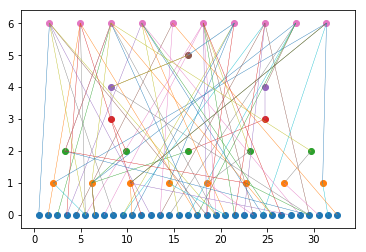

In [10]:
max_nodes_one_layer = np.max(length_of_each_layer)
for path in all_path_side2side:
    node1, node2 = path
    x1, y1 = dict_nodes_graph[node1]
    x2, y2 = dict_nodes_graph[node2]
    
    interval1 = max_nodes_one_layer/length_of_each_layer[y1]
    interval2 = max_nodes_one_layer/length_of_each_layer[y2]
    
    plt.plot([x1*interval1 + interval1/2, x2*interval2 + interval2/2], [y1, y2], linewidth=0.4)

for layer in range(max_length):
    interval = max_nodes_one_layer/length_of_each_layer[layer]
    plt.scatter((interval * np.arange(length_of_each_layer[layer]))+ interval/2, [layer]*length_of_each_layer[layer])

plt.show()

In [11]:
test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
test_y = digits.target[1617:]

In [12]:
numbers = [*range(10)] # number 2 > number 1
number_of_classification = len(numbers)


list_y = test_y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend(li)

samplesize = test_X[digits_indexes].shape[0]
test_x_inputs =[tuple(c) for c in test_X[digits_indexes].tolist()]
test_x_outputs = [tuple(c) for c in test_y[digits_indexes].reshape(samplesize,1).tolist()]

In [13]:
outputs = []
for xi in test_x_inputs:
    output = winner_net.activate(xi)
    outputs.append(output)


px_outputs = softmax(np.array(outputs).reshape(samplesize, number_of_classification), axis=1)
# the index of maximum in each line
test_pred_outputs = np.argmax(px_outputs, axis = 1)
# replace index to real number, from higher number to lower number!!
for i in range(number_of_classification):
    index = number_of_classification - i - 1
    test_pred_outputs[test_pred_outputs==index] = numbers[index]

test_real_outputs = np.array(test_x_outputs).reshape(samplesize,)

In [14]:
test_real_outputs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9])

In [15]:
test_pred_outputs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 5, 5, 2, 5,
       7, 4, 8, 4, 7, 5, 7, 5, 3, 7, 4, 8, 5, 2, 2, 2, 7, 3, 8, 2, 1, 2,
       2, 2, 2, 3, 2, 2, 5, 2, 3, 3, 3, 3, 3, 5, 8, 5, 7, 8, 0, 6, 0, 3,
       3, 3, 5, 3, 3, 4, 4, 4, 7, 3, 4, 4, 4, 4, 5, 4, 6, 6, 4, 6, 4, 4,
       4, 4, 8, 7, 7, 7, 7, 3, 7, 3, 8, 7, 7, 7, 7, 6, 3, 3, 3, 3, 6, 6,
       6, 4, 4, 4, 6, 4, 5, 6, 8, 5, 5, 4, 6, 6, 6, 6, 7, 5, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 5, 4, 7, 3, 7, 7, 4, 4, 0, 7, 3, 5, 8, 8, 8,
       8, 8, 8, 8, 8, 5, 8, 8, 7, 0, 2, 7, 7, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       3, 3, 3, 3])

In [16]:
np.sum(test_pred_outputs == test_real_outputs)/samplesize

0.46111111111111114

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_pred_outputs, test_real_outputs)
print(cm)

[[16  0  0  2  0  0  0  0  1  2]
 [ 0  0  1  0  0  0  0  0  0  0]
 [ 0  1 11  0  0  0  0  0  0  1]
 [ 0  1  2  9  2  6  0  1  1 12]
 [ 0  3  0  0 13  0  5  1  2  0]
 [ 0  6  1  3  1  0  3  2  2  0]
 [ 0  0  0  1  3  1  9  0  0  0]
 [ 0  6  1  1  1  9  0 15  1  3]
 [ 0  2  1  2  0  2  1  0 10  0]
 [ 0  0  0  0  0  0  0  0  0  0]]


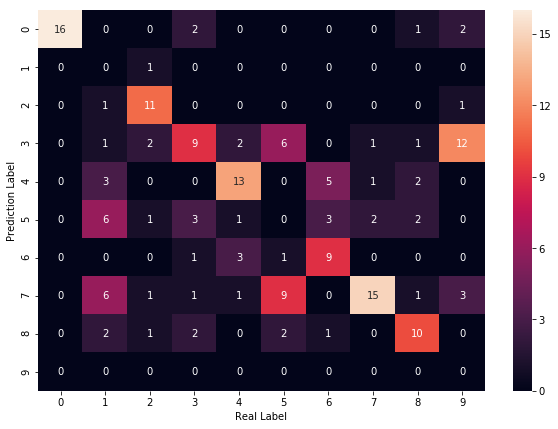

In [18]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [19]:
visualize.draw_net(config, winner, prune_unused=False)
visualize.plot_stats(stats, ylog=False, view=False)
visualize.plot_species(stats, view=False)

In [20]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [21]:
used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])
        
v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)

    
# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1

length of each layers: [33, 8, 5, 2, 2, 1, 10]


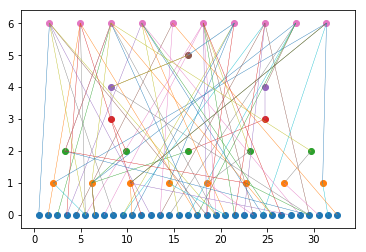

In [22]:
max_nodes_one_layer = np.max(length_of_each_layer)
for path in all_path_side2side:
    node1, node2 = path
    x1, y1 = dict_nodes_graph[node1]
    x2, y2 = dict_nodes_graph[node2]
    
    interval1 = max_nodes_one_layer/length_of_each_layer[y1]
    interval2 = max_nodes_one_layer/length_of_each_layer[y2]
    
    plt.plot([x1*interval1 + interval1/2, x2*interval2 + interval2/2], [y1, y2], linewidth=0.4)

for layer in range(max_length):
    interval = max_nodes_one_layer/length_of_each_layer[layer]
    plt.scatter((interval * np.arange(length_of_each_layer[layer]))+ interval/2, [layer]*length_of_each_layer[layer])

plt.show()

In [23]:
stats

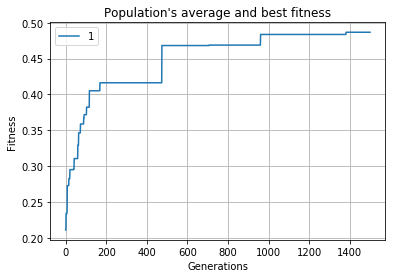

In [24]:

statistics = stats

generation = range(len(statistics.most_fit_genomes))
best_fitness = [c.fitness for c in statistics.most_fit_genomes]
avg_fitness = np.array(statistics.get_fitness_mean())
stdev_fitness = np.array(statistics.get_fitness_stdev())



#plt.plot(generation, avg_fitness, "b-", label="average")
#plt.plot(generation, avg_fitness - stdev_fitness, "g-.", label="-1 sd")
#plt.plot(generation, avg_fitness + stdev_fitness, "g-.", label="+1 sd")

plt.plot(generation, best_fitness, label=i)

plt.title("Population's average and best fitness")
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.grid()
plt.legend(loc="best")
plt.show()

In [29]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(10)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []


used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)


# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1
list_nodes_number.append(np.sum(length_of_each_layer))
list_connection_number.append(len(all_path_side2side))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

length of each layers: [33, 8, 5, 2, 2, 1, 10]
Total nodes:61 Total connections::82
